In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [38]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import math

In [3]:
datadir = '/data/oceanparcels/output_data/data_Reint/'

In [4]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [5]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177','#c51b8a','#f768a1', '#fbb4b9']
r_pl_cmap = plt.get_cmap('RdPu_r')
region_cmap = ['teal', 'darkorange', '#9AE19D']

In [120]:
region = 'SO'
season = ['Jan', 'MAM', 'JJA', 'SON']
season_string = ['January - June', 'March - September', 'June - December', 'September - March']
mortality = 0.39              # [d-1]
runtime = 180                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
biofouling = 'NEMO_detritus'
grazing = 'full'
mixing = 'markov_0_KPP_reflect'+biofouling+'_tidal'
death = 'NEMO+detritus' #,'NEMO losses', 'sudden death'
diss = 0.006
rho_bf = 1388
rho_fr = 1800
sizebinedges = [1e-3, 1e-4, 1e-5]
res ='1x1'
proc = 'bfnoadv'

In [121]:
datadir+'regional_'+region+'_'+proc+'_Jan_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc'

'/data/oceanparcels/output_data/data_Reint/regional_SO_bfnoadv_Jan_2004_1x1res_markov_0_KPP_reflectNEMO_detritus_tidalmixing_full_grazing_006diss_1388rhobf_1800rhofr_180days_60dtsecs_12hrsoutdt.nc'

In [122]:
ds_0 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+season[0]+'_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+season[1]+'_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+season[2]+'_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_3 = xr.open_dataset(datadir+'regional_'+region+'_'+proc+'_'+season[3]+'_2004_'+res+'res_'+mixing+'mixing_'+grazing+'_grazing_'+str(diss)[2:]+'diss_'+str(rho_bf)+'rhobf_'+str(rho_fr)+'rhofr_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [123]:
dslist = [ds_0, ds_1, ds_2, ds_3]

In [124]:
number_of_trajectories_to_plot = 1330
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 1330 of 10000 trajectories
plotting every 8 particles


In [125]:
for ds in dslist:
    ds['days'] = (['traj','obs'],(ds['time'][:,:].T.values-ds['time'][:,0].T.values).T.astype(np.float64)/86400/1e9)

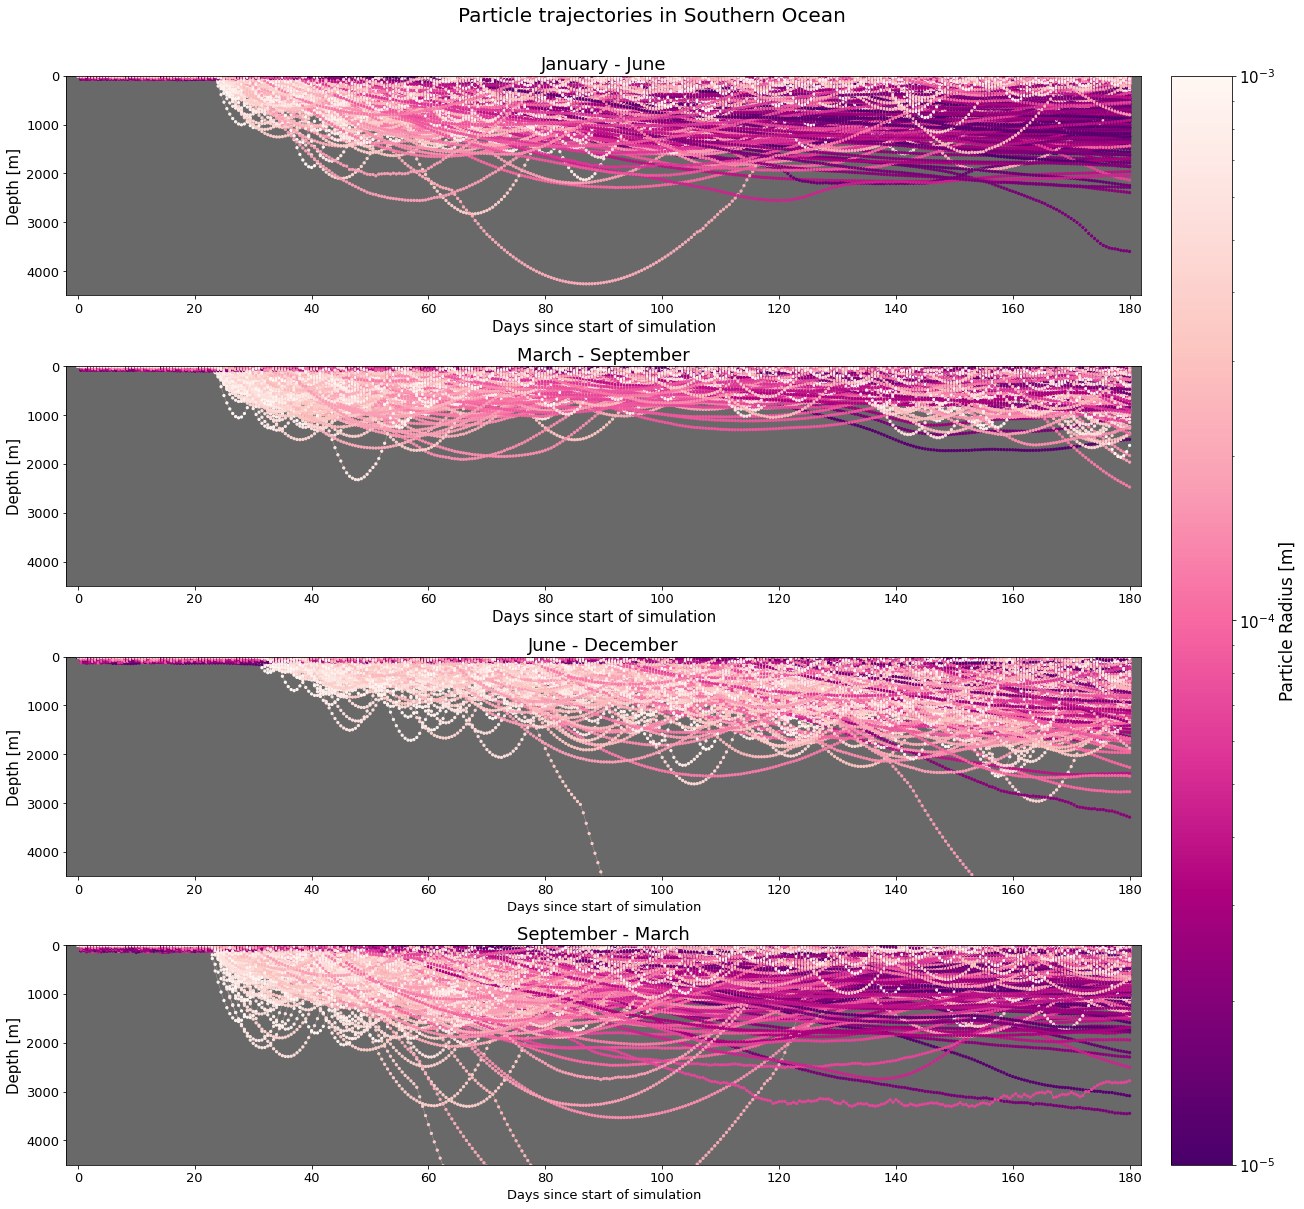

In [130]:
maxdepth = 4500
fig, axs = plt.subplots(4, 1, figsize=(18,16), constrained_layout=True)
fig.suptitle('Particle trajectories in '+regions[region], y= 1.04, fontsize = 20)

sc = axs[0].scatter(ds_0['days'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], s=5, c=np.tile(ds_0['r_pl'].T[::f_plt],[len(ds_0['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_0['r_pl'].min(), vmax=ds_0['r_pl'].max()),zorder=2)
ln = axs[0].plot(ds_0['days'].T[:,::f_plt], ds_0['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[0].set_title(season_string[0], fontsize=18)
axs[0].set_ylabel('Depth [m]', fontsize=15)
axs[0].set_xlabel('Days since start of simulation', fontsize=15)
axs[0].tick_params(axis='both', labelsize=13)
axs[0].set_facecolor('dimgray')
axs[0].set_ylim(maxdepth,0)
axs[0].set_xlim(-2,182)
# axs[0].set_xticks([0,10,20,30,40,50,60,70,80,90])
axs[0].set_xticks([0,20,40,60,80,100,120,140,160,180])
# ax1.invert_yaxis()

sc = axs[1].scatter(ds_1['days'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], s=5, c=np.tile(ds_1['r_pl'].T[::f_plt],[len(ds_1['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_1['r_pl'].min(), vmax=ds_1['r_pl'].max()),zorder=2)
ln = axs[1].plot(ds_1['days'].T[:,::f_plt], ds_1['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[1].set_title(season_string[1], fontsize=18)
axs[1].set_ylabel('Depth [m]', fontsize=15)
axs[1].set_xlabel('Days since start of simulation', fontsize=15)
axs[1].tick_params(axis='both', labelsize=13)
axs[1].set_facecolor('dimgray')
axs[1].set_ylim(maxdepth,0)
axs[1].set_xlim(-2,182)
# axs[1].set_xticks([0,10,20,30,40,50,60,70,80,90])
axs[1].set_xticks([0,20,40,60,80,100,120,140,160,180])
# ax2.invert_yaxis()

sc = axs[2].scatter(ds_2['days'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], s=5, c=np.tile(ds_2['r_pl'].T[::f_plt],[len(ds_2['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_2['r_pl'].min(), vmax=ds_2['r_pl'].max()),zorder=2)
ln = axs[2].plot(ds_2['days'].T[:,::f_plt], ds_2['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[2].set_title(season_string[2], fontsize=18)
axs[2].set_ylabel('Depth [m]', fontsize=15)
axs[2].set_xlabel('Days since start of simulation', fontsize=13)
axs[2].tick_params(axis='both', labelsize=13)
axs[2].set_facecolor('dimgray')
axs[2].set_ylim(maxdepth,0)
axs[2].set_xlim(-2,182)
# axs[2].set_xticks([0,10,20,30,40,50,60,70,80,90])
axs[2].set_xticks([0,20,40,60,80,100,120,140,160,180])
# ax3.invert_yaxis()

sc = axs[3].scatter(ds_3['days'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], s=5, c=np.tile(ds_3['r_pl'].T[::f_plt],[len(ds_3['obs']),1]),cmap=r_pl_cmap,norm=colors.LogNorm(vmin=ds_3['r_pl'].min(), vmax=ds_3['r_pl'].max()),zorder=2)
ln = axs[3].plot(ds_3['days'].T[:,::f_plt], ds_3['z'].T[:,::f_plt], c='mistyrose',linewidth=0.2,zorder=1)
axs[3].set_title(season_string[3], fontsize=18)
axs[3].set_ylabel('Depth [m]', fontsize=15)
axs[3].set_xlabel('Days since start of simulation', fontsize=13)
axs[3].tick_params(axis='both', labelsize=13)
axs[3].set_facecolor('dimgray')
axs[3].set_ylim(maxdepth,0)
axs[3].set_xlim(-2,182)
axs[3].set_xticks([0,20,40,60,80,100,120,140,160,180])

cb = fig.colorbar(sc, ax=axs)
cb.set_label('Particle Radius [m]', fontsize=17)
cb.ax.tick_params(labelsize=15)
plt.show()

In [127]:
depthbins = np.linspace(0,3000,100)
timebins = np.zeros((len(dslist),len(dslist[0]['time'][0])+1), dtype='datetime64[ns]')
for i in range(len(timebins)):
    starttimes=(dslist[i]['time'][0,:]-np.timedelta64(int(outputdt/2.), 'h')).values
    endtime = (dslist[i]['time'][0,-1]+np.timedelta64(int(outputdt/2.), 'h')).values
    timebins[i] = np.append(starttimes,endtime)
    
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
depth_densities = np.zeros((len(dslist),len(split_ds),len(dslist[0]['obs']),len(depthbins)-1))

for k in range(len(dslist)):
    split_ds = list(dslist[k].groupby_bins('r_pl',sizebinedges[::-1]))
    for i in range(len(depth_densities[0])):
        for j in range(len(dslist[k]['obs'])):
            values, bins = np.histogram(split_ds[i][1]['z'].isel(obs=j), depthbins)
            depth_densities[k,i,j] = values/len(split_ds[i][1]['traj'])

Text(0.5, 0.98, 'Particle depth distribution in Southern Ocean (logarithmic)')

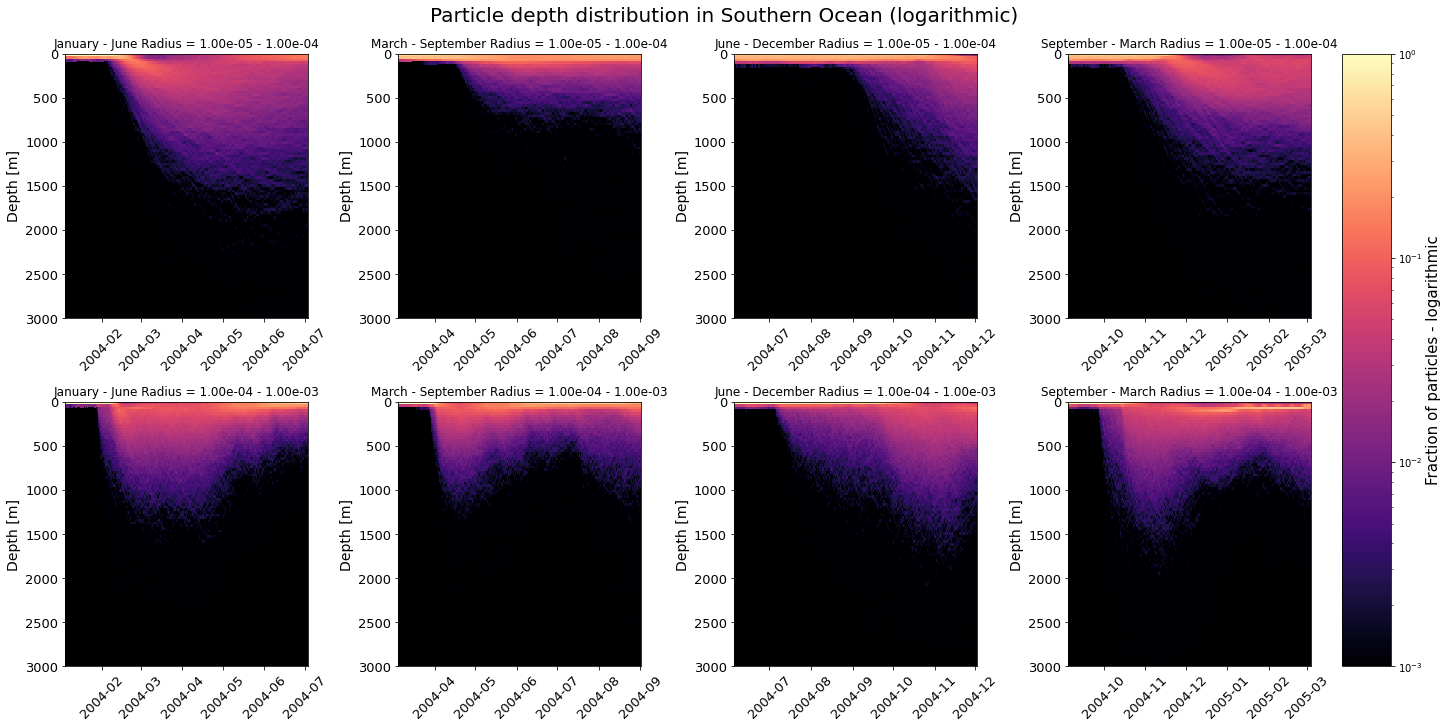

In [128]:
fig = plt.figure(figsize=(20,10),constrained_layout=True)
gs = gridspec.GridSpec(ncols=5, nrows=2, width_ratios=[1,1,1,1,0.2], figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[0, 3])
ax8 = fig.add_subplot(gs[1, 3])
axes = [[ax1, ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]]
ax9 = fig.add_subplot(gs[:, 4])

for i, ax_r in enumerate(axes):
    for c, ax in enumerate(ax_r):
        ax.set_facecolor('k')
        pc = ax.pcolormesh(timebins[i],depthbins,depth_densities[i,c].T, cmap='magma',norm=mcolors.LogNorm(vmin=1e-3, vmax=1))
        #ax.set_title(mixing[0]+' mixing', fontsize=14)
        ax.set_ylabel('Depth [m]', fontsize=14)
        ax.tick_params(axis='both', labelsize=13)
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylim(0, 3000)
        ax.invert_yaxis()
        #cb.set_label('Fraction of particles - logarithmic', size=15)
        ax.set_title(season_string[i]+' Radius = '+"{left:.2e} - {right:.2e}".format(left=split_ds[c][0].left, right=split_ds[c][0].right))
        
cb = fig.colorbar(pc, cax=ax9)
cb.set_label('Fraction of particles - logarithmic', size=15)
fig.suptitle('Particle depth distribution in '+regions[region]+' (logarithmic)', fontsize=20)